In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from imblearn.over_sampling import SMOTE
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('Pharma_data_analysis.xlsx')
df.head(5)

,Distributor,Customer Name,City,Country,Latitude,Longitude,Channel,Sub-channel,Product Name,Product Class,Quantity,Price,Sales,Month,Year,Name of Sales Rep,Manager,Sales Team
0,Gottlieb-Cruickshank,"Zieme, Doyle and Kunze",Lublin,Poland,51.2333,22.5667,Hospital,Private,Topipizole,Mood Stabilizers,4.0,368,1472.0,January,2018,Mary Gerrard,Britanny Bold,Delta
1,Gottlieb-Cruickshank,Feest PLC,Åšwiecie,Poland,53.4167,18.4333,Pharmacy,Retail,Choriotrisin,Antibiotics,7.0,591,4137.0,January,2018,Jessica Smith,Britanny Bold,Delta
2,Gottlieb-Cruickshank,Medhurst-Beer Pharmaceutical Limited,Rybnik,Poland,50.0833,18.5000,Pharmacy,Institution,Acantaine,Antibiotics,30.0,66,1980.0,January,2018,Steve Pepple,Tracy Banks,Bravo
3,Gottlieb-Cruickshank,Barton Ltd Pharma Plc,CzeladÅº,Poland,50.3333,19.0833,Hospital,Private,Lioletine Refliruvax,Analgesics,6.0,435,2610.0,January,2018,Mary Gerrard,Britanny Bold,Delta
4,Gottlieb-Cruickshank,Keeling LLC Pharmacy,Olsztyn,Poland,53.7800,20.4942,Pharmacy,Retail,Oxymotroban Fexoformin,Analgesics,20.0,458,9160.0,January,2018,Anne Wu,Britanny Bold,Delta


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254082 entries, 0 to 254081
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Distributor        254082 non-null  object 
 1   Customer Name      254082 non-null  object 
 2   City               254082 non-null  object 
 3   Country            254082 non-null  object 
 4   Latitude           254082 non-null  float64
 5   Longitude          254082 non-null  float64
 6   Channel            254082 non-null  object 
 7   Sub-channel        254082 non-null  object 
 8   Product Name       254082 non-null  object 
 9   Product Class      254082 non-null  object 
 10  Quantity           254082 non-null  float64
 11  Price              254082 non-null  int64  
 12  Sales              254082 non-null  float64
 13  Month              254082 non-null  object 
 14  Year               254082 non-null  int64  
 15  Name of Sales Rep  254082 non-null  object 
 16  Ma

In [4]:
df.describe()

,Latitude,Longitude,Quantity,Price,Sales,Year
count,254082.000000,254082.000000,254082.000000,254082.000000,2.540820e+05,254082.000000
mean,50.962222,10.803212,112.872139,412.207720,4.643772e+04,2018.385187
std,1.625526,4.143311,744.310385,224.963687,3.491918e+05,1.041352
min,47.514200,6.083800,-7200.000000,22.000000,-4.161600e+06,2017.000000
25%,49.805600,7.891100,5.000000,195.000000,1.704000e+03,2018.000000
50%,51.133300,9.397800,20.000000,430.000000,5.850000e+03,2018.000000
75%,52.083300,12.133300,50.000000,605.000000,2.156525e+04,2019.000000
max,54.781900,23.566700,117600.000000,794.000000,7.420560e+07,2020.000000


Data Labelling (Date: # 1 as a january, 2 as a february, etc)

In [5]:
# Solusi 2: Gunakan pd.to_datetime tanpa format (auto-detect)
df['Date'] = pd.to_datetime(df['Month'].astype(str) + ' ' + df['Year'].astype(str))
df = df.sort_values('Date')
df = df.drop(columns=['Year', 'Month'])

df.head(10)

,Distributor,Customer Name,City,Country,Latitude,Longitude,Channel,Sub-channel,Product Name,Product Class,Quantity,Price,Sales,Name of Sales Rep,Manager,Sales Team,Date
43630,Erdman,Waelchi LLC Pharm,Sinsheim,Germany,49.2500,8.8833,Pharmacy,Retail,Belavarix Benzabicin,Antibiotics,50.0,131,6550.0,Anne Wu,Britanny Bold,Delta,2017-01-01
43172,Gerlach LLC,Kozey Ltd Pharma Plc,Griesheim,Germany,49.8594,8.5525,Pharmacy,Institution,Amphesirox,Antiseptics,10.0,25,250.0,Daniel Gates,Alisha Cordwell,Charlie,2017-01-01
43173,Gerlach LLC,"Blanda, Stehr and Gleason Pharma Plc",Starnberg,Germany,47.9972,11.3406,Hospital,Private,Tetalamide,Antibiotics,10.0,430,4300.0,Sheila Stones,Britanny Bold,Delta,2017-01-01
43174,Gerlach LLC,Hane Ltd,NÃ¼rtingen,Germany,48.6267,9.3353,Hospital,Government,Decidenu Galantrigine,Antipiretics,10.0,590,5900.0,Daniel Gates,Alisha Cordwell,Charlie,2017-01-01
43175,Gerlach LLC,"Koch, Borer and Hagenes Pharmaceutical Ltd",Lauf,Germany,49.5103,11.2772,Hospital,Private,Cricane Acamsumab,Antiseptics,30.0,22,660.0,Jessica Smith,Britanny Bold,Delta,2017-01-01
43176,Gerlach LLC,Legros-Runte Pharmaceutical Limited,Neckarsulm,Germany,49.1917,9.2244,Hospital,Private,Doxivorin,Antimalarial,7.0,516,3612.0,Sheila Stones,Britanny Bold,Delta,2017-01-01
43177,Gerlach LLC,"Wiegand, Jast and Yost Pharmaceutical Ltd",Ludwigshafen,Germany,49.4811,8.4353,Pharmacy,Institution,Antilamin Clinbital,Antibiotics,20.0,664,13280.0,Morris Garcia,Tracy Banks,Bravo,2017-01-01
43178,Gerlach LLC,Welch-Langworth Pharm,Papenburg,Germany,53.0667,7.4000,Hospital,Private,Sumanazole,Analgesics,32.0,529,16928.0,Abigail Thompson,Tracy Banks,Bravo,2017-01-01
43179,Gerlach LLC,"Sanford, Franecki and Greenholt Pharmaceutical...",Rheine,Germany,52.2833,7.4333,Pharmacy,Institution,Raparidol,Mood Stabilizers,40.0,187,7480.0,Sheila Stones,Britanny Bold,Delta,2017-01-01
43180,Gerlach LLC,Kihn Group Pharm,Vaihingen an der Enz,Germany,48.9328,8.9564,Hospital,Private,Pazofenac,Mood Stabilizers,24.0,123,2952.0,Thompson Crawford,James Goodwill,Alfa,2017-01-01


Data Preprocessing

In [6]:
pd.DataFrame(df[['Product Name', 'Product Class']].value_counts().tail(20))

,,0
Product Name,Product Class,
Acycpex,Mood Stabilizers,1017
Afluferon Entrarenone,Antimalarial,1017
Cordamectin Actolamin,Antipiretics,1016
Ergomethate,Mood Stabilizers,1015
Travosoline Capolac,Antipiretics,1014
Ranediol,Antibiotics,1014
Algluconium Dorzofoxin,Antibiotics,1013
Pulmogen Alitora,Antiseptics,1012
Aggretisol,Antimalarial,1011


In [7]:
# We classified from product class
pd.DataFrame(df['Product Class'].value_counts())

,Product Class
Antiseptics,52037
Mood Stabilizers,46415
Analgesics,44751
Antibiotics,36979
Antipiretics,36955
Antimalarial,36945


In [8]:
# Get numeric columns excluding Date and index
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# Remove 'Date' if exists
if 'Date' in numeric_columns:
    numeric_columns.remove('Date')

# Display numeric data only
df[numeric_columns].head()

,Latitude,Longitude,Quantity,Price,Sales
43630,49.2500,8.8833,50.0,131,6550.0
43172,49.8594,8.5525,10.0,25,250.0
43173,47.9972,11.3406,10.0,430,4300.0
43174,48.6267,9.3353,10.0,590,5900.0
43175,49.5103,11.2772,30.0,22,660.0


Data Visualisations

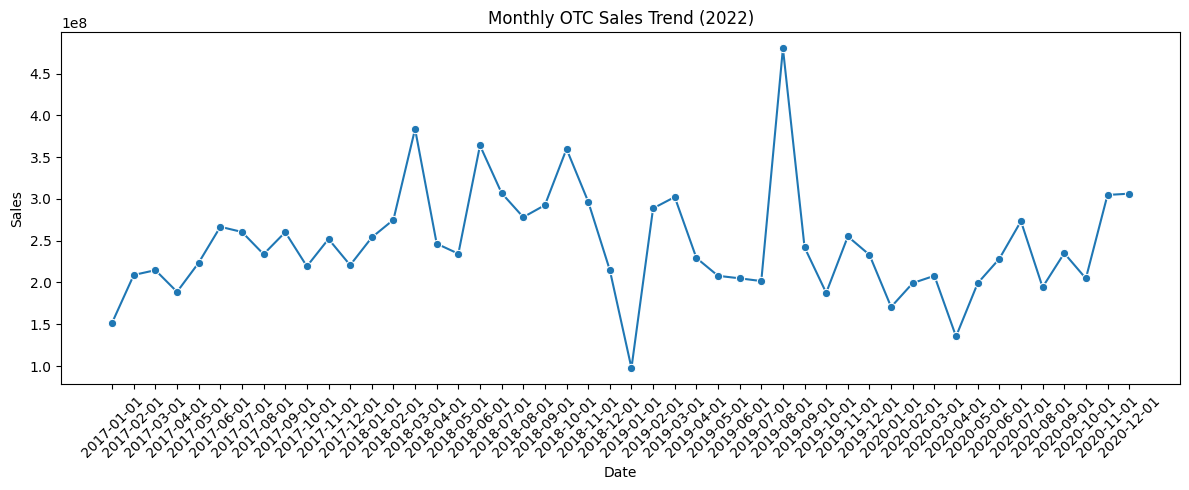

In [9]:
monthly_sales = df.groupby('Date')['Sales'].sum().reset_index()
monthly_sales.columns = ['Date', 'Sales']  # Ubah nama kolom
monthly_sales['Date'] = monthly_sales['Date'].astype(str) # For plotting

# Plot
plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_sales, x='Date', y='Sales', marker='o')
plt.title('Monthly OTC Sales Trend (2022)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

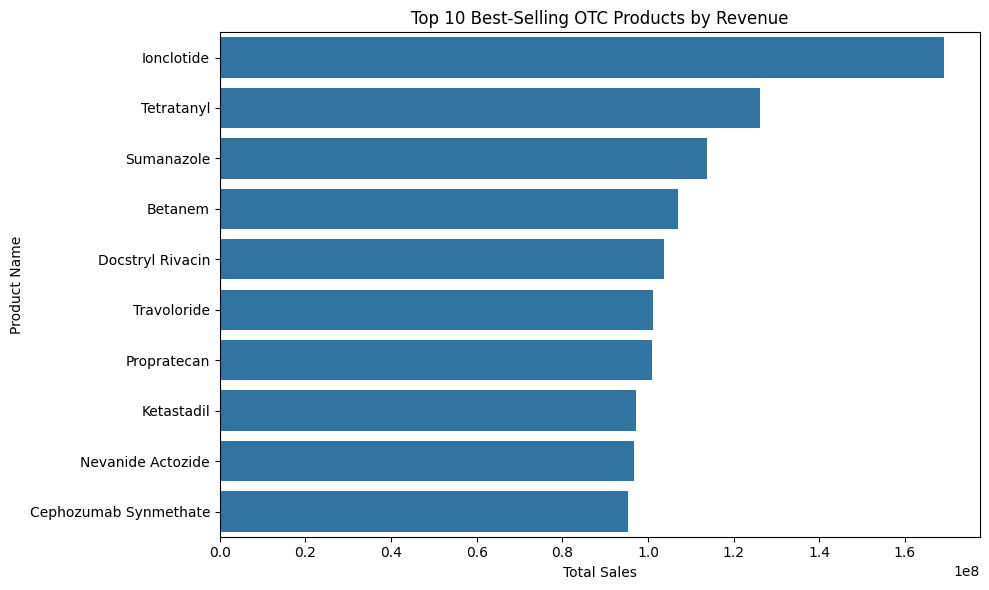

In [10]:
# Top 10 Products by Revenue
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top 10 Best-Selling OTC Products by Revenue')
plt.xlabel('Total Sales')
plt.tight_layout()
plt.show()

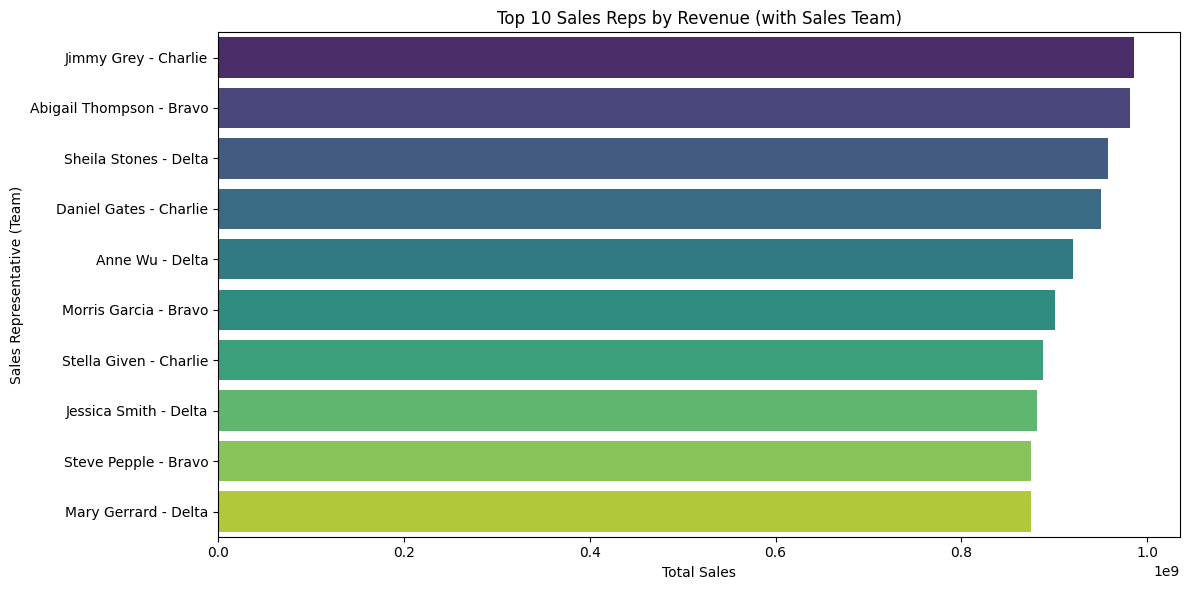

In [11]:
# Sales by Name of sales rep and sales team
sales_rep = df.groupby(['Name of Sales Rep', 'Sales Team'])['Sales'].sum().reset_index()

# sort by sales rep revenue
sales_rep = sales_rep.sort_values('Sales', ascending=False).head(10)

# Create combines label ( Sales rep - Sales Team)
sales_rep['Label'] = sales_rep['Name of Sales Rep'] + ' - ' + sales_rep['Sales Team']

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=sales_rep, x='Sales', y='Label', palette='viridis')
plt.title('Top 10 Sales Reps by Revenue (with Sales Team)')
plt.xlabel('Total Sales')
plt.ylabel('Sales Representative (Team)')
plt.tight_layout()
plt.show()

Top 10 Cities Statistics:
                Total_Sales  Avg_Sales  Transactions  Total_Qty  Avg_Qty
City                                                                    
Butzbach        93561780.00  247517.94           378  174234.00   460.94
Baesweiler      64890501.00  163041.46           398  132080.00   331.86
Cuxhaven        56006680.00  145095.03           386  124868.00   323.49
Friedberg       52183634.60   65557.33           796  124236.40   156.08
Altenburg       50885320.00  128823.59           395   94970.00   240.43
Emsdetten       45939009.00  119322.10           385   89970.00   233.69
Bottrop         44454616.00  122802.81           362  103978.00   287.23
Freising        43779381.00  112833.46           388  100146.00   258.11
Trier           43495626.00  121496.16           358   90563.00   252.97
Castrop-Rauxel  42066659.97  100158.71           420   91253.73   217.27


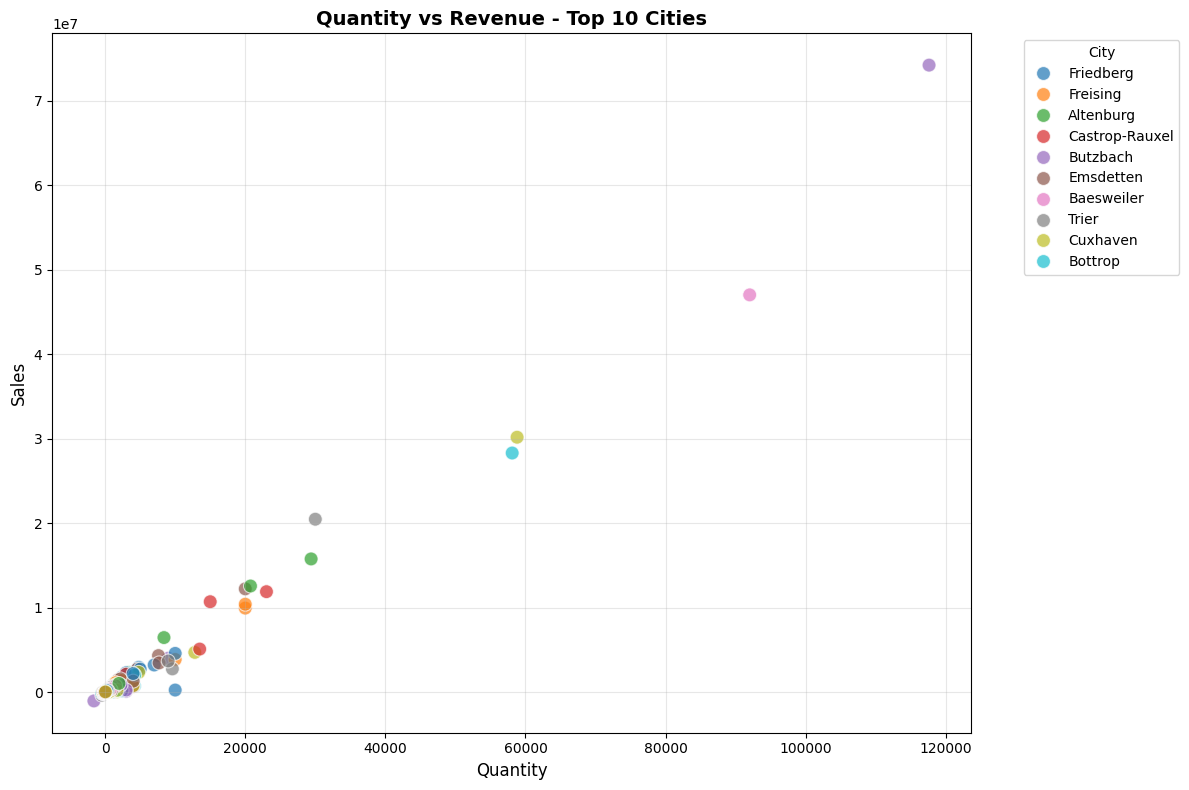

In [12]:
# Ambil 10 city dengan total sales tertinggi
top_10_cities_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10)
top_10_cities = top_10_cities_sales.index

# Filter dataframe
df_top_cities = df[df['City'].isin(top_10_cities)]

city_stats = df_top_cities.groupby('City').agg({
    'Sales': ['sum', 'mean', 'count'],
    'Quantity': ['sum', 'mean']
}).round(2)

city_stats.columns = ['Total_Sales', 'Avg_Sales', 'Transactions', 'Total_Qty', 'Avg_Qty']
city_stats = city_stats.sort_values('Total_Sales', ascending=False)

# print informations
print("Top 10 Cities Statistics:")
print(city_stats)

# Scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_top_cities, x='Quantity', y='Sales', hue='City', 
                s=100, alpha=0.7, palette='tab10')
plt.title('Quantity vs Revenue - Top 10 Cities', fontsize=14, fontweight='bold')
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='City', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Split data into X and y

In [13]:
from sklearn.model_selection import train_test_split, cross_val_score


# Split data
X = df[numeric_columns].drop(columns=['Sales', 'Latitude', 'Longitude'])
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Feature Engineering and Data Modelling

In [14]:
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

# Data Modelling
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
}

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train and evaluate models
results = {}

for name, model in models.items():
    # Fit model
    model.fit(X_train_scaled if name != 'Random Forest' 
              else X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test_scaled if name != 'Random Forest'
                           else X_test)

    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

   # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        'model': model,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R² Score': r2,
        'y_pred': y_pred,
    }

# Display results
for name, metrics in results.items():
    print(f"{name} Results:")
    print(f"  MSE:  {metrics['MSE']:.4f}")
    print(f"  RMSE: {metrics['RMSE']:.4f}")
    print(f"  MAE:  {metrics['MAE']:.4f}")
    print(f"  R²:   {metrics['R² Score']:.4f}")

Linear Regression Results:
  MSE:  18777662896.6987
  RMSE: 137031.6128
  MAE:  29476.3145
  R²:   0.8419
Random Forest Results:
  MSE:  466144161.6842
  RMSE: 21590.3720
  MAE:  598.0239
  R²:   0.9961
XGBoost Results:
  MSE:  56271606545.7313
  RMSE: 237216.3707
  MAE:  10928.0089
  R²:   0.5263


In [15]:
results_list = []

# train and evaluate models
for name, model in models.items():
    # Fit model
    model.fit(X_train_scaled if name != 'Random Forest' 
              else X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test_scaled if name != 'Random Forest'
                           else X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results_list.append({
        'Model': name,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R² Score': r2
    })

results_df = pd.DataFrame(results_list)
results_df

,Model,MSE,RMSE,MAE,R² Score
0,Linear Regression,1.877766e+10,137031.612764,29476.314477,0.841916
1,Random Forest,4.670057e+08,21610.313604,601.658844,0.996068
2,XGBoost,5.627161e+10,237216.370737,10928.008891,0.526266
